<a href="https://colab.research.google.com/github/JsNcAr/Metodos1_JasonArias_AngieRicaurte/blob/ramaALRR/p2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def ring_a_radius(r, N):
    """
    Return a list of N points in the ring of radius r
    """
    theta = np.random.uniform(0, 2*np.pi, N)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

In [3]:
def E_x_integrate_function(phi, x, y, z, a=0.5):
    num = x-a*np.cos(phi)
    den = (x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [4]:
def E_y_integrate_function(phi, x, y, z, a=0.5):
    num = y-a*np.sin(phi)
    den = (x**2+y**2+z**2+a**2+2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [5]:
def E_z_integrate_function(phi, x, y, z, a=0.5):
    num = z
    den = (x**2+y**2+z**2+a**2+2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    return num/den

In [6]:
def points_in_ring(r, N):
    """
    Return a list of N points in the ring of radius r
    """
    theta = np.random.uniform(0, 2*np.pi, N)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

In [7]:
def MonteCarlo_integration_phi(f,a, b, x, y, z,  N=100000):
    """
    Return the integral of f over phi using Monte Carlo integration
    """
    phi = np.random.uniform(a, b, N)
    return 2*np.pi*np.mean(f(phi, x, y, z))


In [8]:
def E_field(x, y, z, a=0.5):
    Ex = MonteCarlo_integration_phi(E_x_integrate_function, 0, 2 * np.pi, x, y,
                                    z) / (2 * np.pi)
    Ey = MonteCarlo_integration_phi(E_y_integrate_function, 0, 2 * np.pi, x, y,
                                    z) / (2 * np.pi)
    Ez = MonteCarlo_integration_phi(E_z_integrate_function, 0, 2 * np.pi, x, y,
                                    z) / (2 * np.pi)
    return Ex, Ey, Ez


In [9]:
print(E_field(0.6, 0.6, 1))

(0.2114906891287162, 0.21117569978569242, 0.4404516251900374)


In [10]:
N = 6
x = np.linspace(-0.6, 0.6, N)
y = np.linspace(-0.6, 0.6, N)
z = np.linspace(-0.6, 0.6, N)

In [11]:
Ex = np.zeros((N, N, N))
Ey = np.zeros((N, N, N))
Ez = np.zeros((N, N, N))

(-0.6, 0.6)

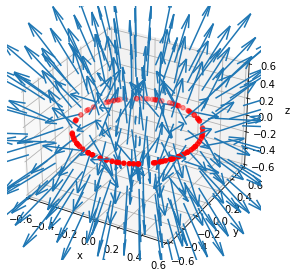

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')

for i in range(N):
    for j in range(N):
        for k in range(N):
            Ex[i,j,k], Ey[i,j,k], Ez[i,j,k] = E_field(x[i], y[j], z[k])
            ax.quiver(x[i], y[j], z[k], Ex[i,j,k], Ey[i,j,k], Ez[i,j,k], length=0.5, normalize=True)
x_r, y_r = ring_a_radius(0.5, 100)
ax.scatter(x_r, y_r ,color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_zlim(-0.6, 0.6)

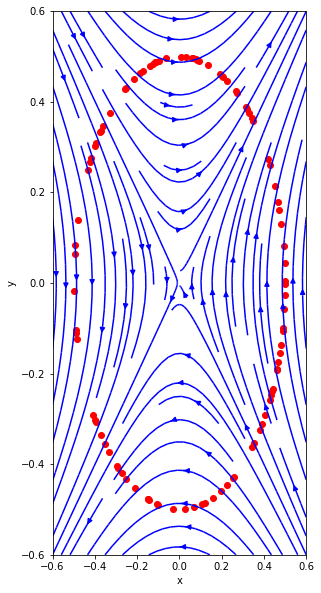

In [13]:
# E field in the xy plane
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(122)
ax.streamplot(x, y, Ex[:,:,0], Ey[:,:,0], color='blue')
ax.scatter(x_r, y_r ,color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)

plt.show()


In [14]:
# Field of z = 0.6
print("Field on xy plane")
print("Ex                   Ey")
for i in range(N):
    for j in range(N):
        print(Ex[i,j,0], Ey[i,j,0])


Field on xy plane
Ex                   Ey
-0.44822038874880576 -0.444992354175614
-0.5382055823488491 -0.3227401578805362
-0.5767133019637474 -0.11501099644624488
-0.5766377120080867 0.11677511272991632
-0.539456437095484 0.32374417701487196
-0.4449745315352435 0.44630013338758223
-0.3229651475868934 -0.5389752842800621
-0.3574438818375428 -0.3566866972517665
-0.3456573087331666 -0.11875932923456521
-0.34835939481419687 0.11675974298757587
-0.35925660317847063 0.35642186869906994
-0.3236816594525834 0.5375777657355763
-0.11456497227142187 -0.5773049644900214
-0.11596450889994256 -0.3501936522854552
-0.09873294861636847 -0.09968004854973044
-0.10402121904125444 0.0988251808681489
-0.11409670430568805 0.34744395284418916
-0.11536496516594097 0.5766994684823438
0.11414123143184748 -0.5765185365233653
0.11991249005150101 -0.3473255262075347
0.09872980566144275 -0.10477331998335032
0.10255001881730716 0.10332654678718861
0.116623728010214 0.34679478925903284
0.11534664450235164 0.5761420246